In [1]:
import os
print('tese git')

tese git


In [6]:
import monai
from monai.networks.nets import resnet10
from monai.networks.blocks import Convolution
import torch

class CustomResNet10(monai.networks.nets.ResNet):
    def __init__(self, dropout_prob=0.5, **kwargs):
        super().__init__(
            block=resnet10.BasicBlock,
            layers=[1, 1, 1, 1],  # ResNet10的层数配置
            block_inplanes=resnet10.BasicBlock.inplanes,
            **kwargs
        )
        self.dropout = monai.networks.layers.Dropout(dropout_prob)

    def _forward_impl(self, x):
        # 原始ResNet10的前向传播
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        # 在平均池化和全连接层之间添加Dropout
        x = self.avgpool(x)
        x = monai.networks.layers.AdaptiveAvgPool2d(1)(x)
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

# 使用自定义的ResNet10模型
model = CustomResNet10(dropout_prob=0.5)


AttributeError: 'function' object has no attribute 'BasicBlock'

In [4]:
from monai.metrics import compute_roc_auc,get_confusion_matrix,compute_confusion_matrix_metric,compute_roc_auc
from monai.metrics import ConfusionMatrixMetric
import torch
from sklearn.metrics import confusion_matrix




# 假设我们有3个类别和一个批次大小为5的数据集
num_classes = 3
batch_size = 10

# 生成随机预测，通常来自模型的softmax层
y_pred = torch.rand(batch_size, num_classes)

# 将预测转换为概率分布（softmax）
y_pred_softmax = torch.nn.functional.softmax(y_pred, dim=1)

# 生成随机真实标签
y_true = torch.randint(0, num_classes, size=(batch_size,))
y_pred_label = torch.argmax(y_pred_softmax,dim=1)
y_true_one_hot = torch.nn.functional.one_hot(y_true, num_classes=num_classes)
y_pred_label_one_hot = torch.nn.functional.one_hot(y_pred_label, num_classes=num_classes)

# 初始化混淆矩阵度量
confusion_matrix_ = get_confusion_matrix(y_pred_label_one_hot, y_true_one_hot)

# 计算混淆矩阵
# 注意：y_pred_softmax 需要是概率分布形式，而 y_true 需要是标签索引形式
#confusion_matrix = confusion_matrix_metric(y_pred_softmax, y_true_one_hot)
roc_1 = compute_roc_auc(y_pred_label_one_hot,y_true_one_hot)


In [20]:
import os
import pandas as pd
import numpy as np
data_1 = pd.read_excel('../New_Extra_Data/Imaging log HGP CRLM CTs_version3.xlsx',header=4)
#第五列是列名
data_2 = pd.read_excel('../New_Extra_Data/CRLM_TrialBureau_231004_.xlsx',header=4)

Text(0.5, 1.0, 'ap')

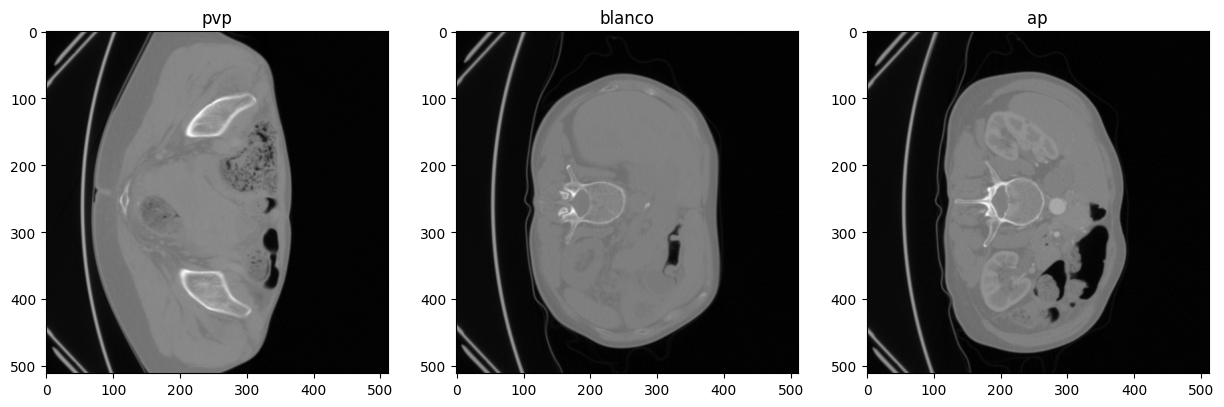

In [98]:
import nibabel as nib
blanco_image = nib.load('./Test_Data/Raw_Phase_data/CILM_CT_104550_0000.nii.gz')
ap_image = nib.load('./Test_Data/Raw_Phase_data/CILM_CT_104551_0000.nii.gz')
pvp_image = nib.load('./Test_Data/Raw_Phase_data/CILM_CT_104552_0000.nii.gz')
#三个子图画一个slice
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(pvp_image.get_fdata()[:,:,20],cmap='gray')
ax[0].set_title('pvp')
ax[1].imshow(blanco_image.get_fdata()[:,:,20],cmap='gray')
ax[1].set_title('blanco')
ax[2].imshow(ap_image.get_fdata()[:,:,20],cmap='gray') 
ax[2].set_title('ap')



c:\Users\Bacon\.conda\envs\samuel\lib\site-packages\monai\utils\deprecate_utils.py:111: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. It will be removed in version 1.3. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead with `channel_dim='no_channel'`.
  warn_deprecated(obj, msg, warning_category)


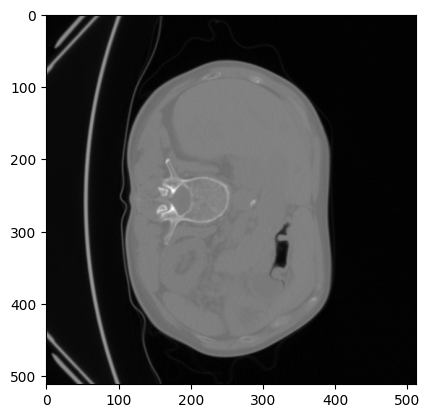

In [142]:
import monai
from monai.transforms import Compose, LoadImage, Lambda,ScaleIntensity,AddChannel
import numpy as np

# 自定义Transform，将HU值转换为灰度值
def convert_hu_to_grayscale(hu_images, hu_min=15, hu_max=80):
    # 将HU值裁剪到指定范围
    hu_images = np.clip(hu_images, hu_min, hu_max)
    # 转换到灰度值（这里简单地将HU值的范围从[hu_min, hu_max]线性映射到[0, 255]）
    grayscale_images = (hu_images - hu_min) / (hu_max - hu_min) * 255.0
    # 返回转换后的图像
    return grayscale_images.astype(np.float32)

blanco_hu_image = convert_hu_to_grayscale(blanco_image.get_fdata()[:,:,:])
ap_hu_image = convert_hu_to_grayscale(ap_image.get_fdata()[:,:,:])
pvp_hu_image = convert_hu_to_grayscale(pvp_image.get_fdata()[:,:,:])


# 这里grayscale_image就是转换后的灰度值图像
transforms = Compose([
    AddChannel(),
    ScaleIntensity(15,80)])
blanco_image_hu_2 = transforms(blanco_image.get_fdata())

plt.imshow(blanco_image_hu_2[0,:,:,20],cmap='gray')


In [4]:
import pandas as pd
data_1 = pd.read_csv('../Test_Data/True_Label/Phase_label_all.csv')
dic_1 = {'Blanco':0,'AP':1,'PVP':2}
data_1['Phase'] = data_1['Phase'].map(dic_1)
data_1.to_csv('../Test_Data/True_Label/Phase_label_all.csv',index=False)

In [138]:
blanco_image

Text(0.5, 1.0, 'ap')

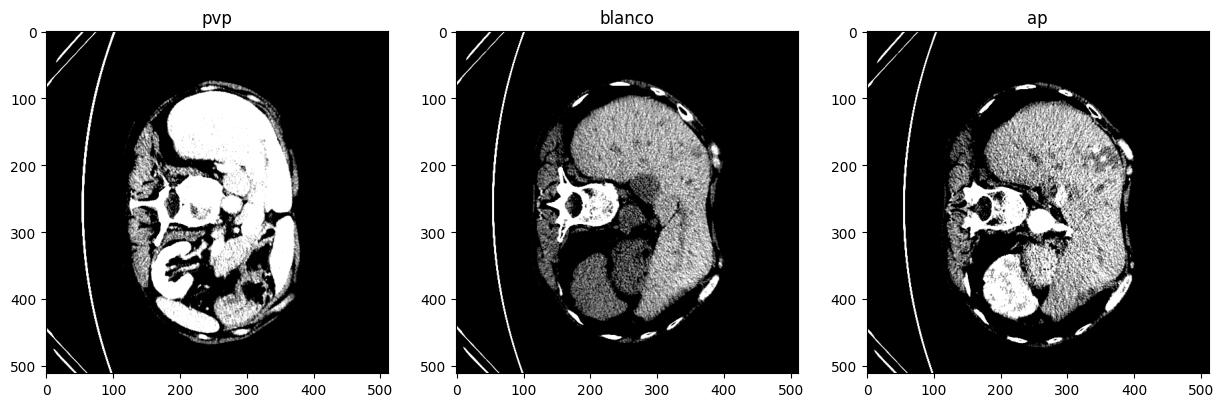

In [131]:

#plt.imshow(blanco_hu_image[:,:,109],cmap='gray')
#画出三种不同的
fig,ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(pvp_hu_image[:,:,60],cmap='gray')
ax[0].set_title('PVP')
ax[1].imshow(blanco_hu_image[:,:,26],cmap='gray')
ax[1].set_title('Blanco')
ax[2].imshow(ap_hu_image[:,:,45],cmap='gray')
ax[2].set_title('AP')


In [105]:
blanco_image.shape,pvp_image.shape,ap_image.shape

((512, 512, 37), (512, 512, 79), (512, 512, 61))

In [38]:
mask_1[mask_1==2]=1

In [37]:
mask_1.sum()

834944.0

In [29]:
import nibabel as nib
mask_1 = nib.load('../Test_Data/Seg_Phase_Data/CILM_CT_101040.nii.gz').get_fdata()
#mask_1[mask_1 == 2] = 1



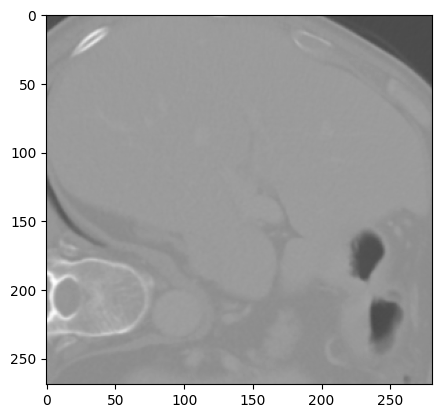

In [49]:
import matplotlib.pyplot as plt
crop_1 = nib.load('../Test_Data/Test_Cropped/CILM_CT_101040_0000.nii.gz').get_fdata()


plt.imshow(crop_1[:,:,20],cmap='gray')

In [28]:
set(data_1['PID'].tolist()).difference(set(data_2['PID'].tolist()))

{265994,
 377631,
 410611,
 1029276,
 1055209,
 1064567,
 1131673,
 1157284,
 1173298,
 1336841,
 1780834,
 1839348,
 1872150,
 2550583,
 2565701,
 2590444,
 2752471,
 2774723,
 2805049,
 3289107,
 3295695,
 3497959,
 3679693,
 3801275,
 3828190,
 3835063,
 4062798,
 4267801,
 4346065,
 4391369,
 4445236,
 4723543,
 4759717,
 4796367,
 5002654,
 5071314,
 5088272,
 5130984,
 5157798,
 5325761,
 6023209,
 6274929,
 6387510,
 6389799,
 6493449,
 7118545,
 7327180,
 7416593,
 7591120,
 7648607,
 7652278,
 7777608,
 8102169,
 8690842,
 8805017,
 8910704,
 9129907,
 9149064,
 9172042,
 9353075,
 9882025}

In [169]:
import os
import pandas as pd
import nibabel as nib
import datetime
import json
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, WeightedRandomSampler
import numpy as np
from sklearn.preprocessing import label_binarize
import einops # for ViT
from torch import tensor

from torchsummary import summary
import monai
from monai.metrics import get_confusion_matrix,compute_roc_auc
from monai.apps import download_and_extract
from monai.config import print_config
from monai.data import DataLoader, ImageDataset
from monai.transforms import (
    EnsureChannelFirst,
    RandZoom,
    Compose,
    RandRotate,
    RandFlip,
    RandGaussianNoise,
    ToTensor,
    Resize,
    Rand3DElastic,
    RandSpatialCrop
    )


#################################################################################
#                                Utils functions                                #
#################################################################################
TIME_RUN = time_run = datetime.datetime.now().strftime("%Y-%m-%d-%H:%M:%S").replace(' ', '_').replace('-', '_').replace(':', '.')

def plot(train_loss_epoch_x_axis, epoch_loss_values, val_loss_epoch_x_axis, val_loss_values, path, current_epoch):
    """
    Generate and save three types of loss plots (train loss, test loss, and combined) as PNG images.
    Additionally, save the loss data and x-axis values as numpy arrays.

    Parameters:
        train_loss_epoch_x_axis (list or array): X-axis values for the train loss plot (epochs).
        epoch_loss_values (list or array): Train loss values corresponding to each epoch.
        val_loss_epoch_x_axis (list or array): X-axis values for the test loss plot (epochs).
        val_loss_values (list or array): Test loss values corresponding to each epoch.
        path (str): Directory path where the plots and numpy arrays will be saved.
        current_epoch (int): The current epoch number for which the plots are being generated.
    """

    plt.plot(train_loss_epoch_x_axis,epoch_loss_values, label='Train loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Train loss (epoch {current_epoch})')
    plt.legend()
    plt.savefig(path+'/Train_loss.png')
    plt.clf()

    plt.plot(val_loss_epoch_x_axis , val_loss_values, label='Test loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'test loss (epoch {current_epoch})')
    plt.legend()
    plt.savefig(path+'/test_loss.png')
    plt.clf()


    plt.plot(train_loss_epoch_x_axis,epoch_loss_values, label='Train loss')
    plt.plot(val_loss_epoch_x_axis , val_loss_values, label='Test loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Train and test loss (epoch {current_epoch})')
    plt.legend()
    plt.savefig(path+'/combi_loss.png')
    plt.clf()

    # also save them as a npy file
    np.save(path+'/train_loss.npy', epoch_loss_values)
    np.save(path+'/val_loss.npy', val_loss_values)
    np.save(path+'/train_loss_epoch_x_axis.npy', train_loss_epoch_x_axis)
    np.save(path+'/val_loss_epoch_x_axis.npy', val_loss_epoch_x_axis)

class DataFiles:
    def __init__(self,data_path,label_path) -> None:
        self.data_path = data_path
        self.label_path = label_path

    def get_images(self):
        return [os.path.join(self.data_path, filename) for filename in os.listdir(self.data_path)]

    def get_labels(self,label_name):
        return pd.read_csv(self.label_path)[label_name].values.tolist()

    def Data_check(self):
        assert len(self.get_images()) == len(self.get_labels()) , 'The number of images and labels are not equal'

class Image_Dataset(ImageDataset):
    def __init__(self,image_files,labels,transform_methods=None,data_aug=True,label_name=None,*args,**kwargs):

        if data_aug:
            transform = Compose(transform_methods)
        else:
            transform = None

        super().__init__(image_files=image_files,labels=labels,transform=transform,*args, **kwargs)


class Metrics():
    def __init__(self,num_class=2,y_pred=None,y_true_label=None):
        """
        args:
            y_pred: list of predicted tensor
            y_true_label: list of true labels
        """
        self.num_class = num_class
        self.four_rate_dic = {str(i):{'tp':0,'fp':0,'tn':0,'fn':0} for i in range(num_class)}
        self.y_true_label = y_true_label
        self.y_pred_label = [torch.argmax(y_pre,dim=1).item() for y_pre in y_pred]
        self.y_pred_one_hot = torch.nn.functional.one_hot(torch.tensor(self.y_pred_label),num_classes=self.num_class)
        self.y_true_one_hot = torch.nn.functional.one_hot(torch.tensor(y_true_label),num_classes=self.num_class)
      
    def get_roc(self,average='macro'):
        return compute_roc_auc(self.y_pred_one_hot,self.y_true_one_hot,average)
        

    def get_four_rate(self) -> tensor:
        """
        args:
            y_pred: (B,C) one-hot tensor
            y_true: (B,C) one-hot tensor
        """
        confu_matrix = get_confusion_matrix(self.y_pred_one_hot,self.y_true_one_hot)
        #calculate tp,fp,tn,fn
        for i in range(self.num_class):
            self.four_rate_dic[str(i)]['tp'] += confu_matrix[:,i,0].sum()
            self.four_rate_dic[str(i)]['fp'] += confu_matrix[:,i,1].sum() 
            self.four_rate_dic[str(i)]['tn'] += confu_matrix[:,i,2].sum() 
            self.four_rate_dic[str(i)]['fn'] += confu_matrix[:,i,3].sum()
        return self.four_rate_dic
    
    def get_accuracy(self) -> float:
        """
        args:
            y_pred_label: list of predicted labels
            y_true_label: list of true labels
        """
        accuracy = accuracy_score(self.y_pred_label,self.y_true_label)
        return accuracy
    
    def get_f1_score(self,average='macro') -> float:
        return f1_score(self.y_pred_label,self.y_true_label,average=average)


class Balanced_sampler(WeightedRandomSampler):
    def __init__(self,labels:tensor,num_class=3,*args,**kwargs) -> None:
        """
        args:
            labels: torch tensor 
        """
        labels = np.asarray(labels).astype(int)
        class_freq = [len(np.where(labels==i)[0]) for i in range(num_class)]
        weights = [1.0/class_freq[label] for label in labels]
        print(len(class_freq),len(weights))
        super().__init__(weights=weights,num_samples=len(weights),replacement=True,*args,**kwargs)

class Parameters:
    def __init__(self) -> None:
        self._cross_val_par = None
        self._model_par = None
        self._loss_par = None
        self._model_info = None


    @property
    def cross_val_par(self):
        return self._cross_val_par
    
    @property
    def model_par(self):
        return self._model_par
    
    @property
    def loss_par(self):
        pass

    @property
    def model_info(self):
        return self._model_info

    @loss_par.setter
    def loss_par(self,value):
        self._loss_par = value
    
    @cross_val_par.setter
    def cross_val_par(self,value):
        self._cross_val_par = value

    @model_par.setter
    def model_par(self,value):
        self._model_par = value
    
    @model_info.setter
    def model_info(self,value):
        self._model_info = value

    @loss_par.getter
    def loss_par(self):
        return self._loss_par
    
    @cross_val_par.getter
    def cross_val_par(self):
        return self._cross_val_par
    
    @model_par.getter
    def model_par(self):
        return self._model_par
    
    @model_info.getter
    def model_info(self):
        return self._model_info



    def aggregate_par(self):
        self.par = {**self._cross_val_par,**self._data_par}
        return self.par

class SaveResults:
    def __init__(self,result_path) -> None:
        """
        args:
            epoch: int
        """
        self.result_path = result_path
        self._path_check()
    
    def df_results(self,four_rate_dic,auc,accuracy,f1,loss,epoch):
        #each epoch save the results
          # 使epoch从1开始编号，而不是0
        epoch_data = {'epoch':  epoch +1}

    # 遍历每个类别的统计数据
        for class_id, metrics in four_rate_dic.items():
            # 为每个度量指标创建一个键
            for metric_name, metric_value in metrics.items():
                # 创建一个新的键，格式为"class_x_metric"
                key = f'class_{class_id}_{metric_name}'
                # 将该度量的值分配给这个键
                epoch_data[key] = metric_value.item()  # 转换tensor为Python标量
        
        df = pd.DataFrame([epoch_data])      
        df['accuracy'] = accuracy
        df['roc_auc'] = auc
        df['f1_score'] = f1
        df['loss'] = loss

        return df
    def store_results(self,df,type='Train'):
        df.to_csv(self.result_path + type +'.csv',index=False)
    
    def _path_check(self):
        if not os.path.exists(self.result_path):
            os.makedirs(self.result_path)
            print(f'Create the {self.result_path} directory')



#################################################################################
#                                Data Loader                                #
#################################################################################
#check pin,cuda
print(f"torch.cuda.is_available():{torch.cuda.is_available()}")
print(f"torch.cuda.device_count():{torch.cuda.device_count()}")
# set the device
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'cpu'
# set the model
model = monai.networks.nets.resnet10(n_input_channels=1, num_classes=3, widen_factor=1).to(device)
sigmiod = torch.nn.Sigmoid()

#set the dataset and dataloader
image_files,labels = DataFiles('../Test_Data/Train_Small_Data',label_path='../True_Label/FINAL_PHASE_LABEL_Test.csv').get_images(),DataFiles('../Test_Data/Train_Small_Data',label_path='../Test_Data/True_Label/FINAL_PHASE_LABEL_Test.csv').get_labels('Phase')
check_ds = Image_Dataset(image_files,labels,transform_methods=[])
check_loader = DataLoader(dataset=check_ds,batch_size=1,num_workers=0,pin_memory=False,)
im, label = monai.utils.misc.first(check_loader)

im = nib.load(image_files[0])
im = im.get_fdata()
print('im.shape: ', im.shape)


val_interval = 1
plot_interval = 5
#################################################################################
#                                Train model                                 #
#################################################################################
# set model info and parameters
Tr_Pars = Parameters()
Tr_Pars.model_par = {'lr':0.01,'max_epchos':100,'batch_size':1,
                              'data_aug':True,
                              'transform_methods':[
                                EnsureChannelFirst(),
                                # Data augmentation
                                RandZoom(prob = 0.5, min_zoom=1.0, max_zoom=1.2),
                                RandRotate(range_z = 0.35, prob = 0.8),
                                RandFlip(prob = 0.5),
                                RandSpatialCrop((186,144,75), random_size=False),
                                # To tensor
                                ToTensor()
                                ]
                             }
Tr_Pars.loss_par = {'loss':nn.CrossEntropyLoss()}
Tr_Pars.cross_val_par = {'fold':5}
Tr_Pars.model_info = {'model_name':'resnet10','model_type':'classification','experiment_name':'Phase_Detector_test','balanced_sampling':True}
optimizer = torch.optim.Adam(model.parameters(), lr=Tr_Pars.model_par['lr'])
max_epcho = Tr_Pars.model_par['max_epchos']
batch_size = Tr_Pars.model_par['batch_size']
loss_function = Tr_Pars.loss_par['loss']
tr_transform_methods = Tr_Pars.model_par['transform_methods']
val_transform_methods = [EnsureChannelFirst(), 
                          RandSpatialCrop((186,144,75),random_size=False),
                                ]
#set the cross validation
stratify_kfold = StratifiedKFold(n_splits=Tr_Pars.cross_val_par['fold'],shuffle=True,random_state=42)
#set the result path

#set save results
ts_result_saver = SaveResults('../Test_Data/model_results/' + TIME_RUN + '/test_results/')


torch.cuda.is_available():True
torch.cuda.device_count():1
im.shape:  (274, 286, 195)
Create the ../Test_Data/model_results/2023_11_04_20.14.59/test_results/ directory


In [171]:

for fold,(train_idx,val_idx) in enumerate(stratify_kfold.split(image_files,labels)):
    train_images,train_labels = [image_files[i] for i in train_idx],[labels[i] for i in train_idx]
    val_images,val_labels = [image_files[i] for i in val_idx],[labels[i] for i in val_idx ]
    # creat train dataset and dataloader
    train_ds, val_ds = Image_Dataset(train_images,train_labels,transform_methods=tr_transform_methods),Image_Dataset(val_images,val_labels,transform_methods=[EnsureChannelFirst(), 
                          RandSpatialCrop((186,144,75),random_size=False),
                                ])
    
    # set saver
    tr_result_saver = SaveResults('../Test_Data/model_results/' + TIME_RUN + '/' + 'train_results/' +str(fold) +'/')
    #set sampler
    sampler = Balanced_sampler(labels=train_labels)
    train_loader,val_loader = DataLoader(dataset=train_ds,batch_size=Tr_Pars.model_par['batch_size'],num_workers=0,pin_memory=True,sampler=sampler),DataLoader(dataset=val_ds,batch_size=1,num_workers=0,pin_memory=True)
    for epoch in range(max_epcho):
        print("-" * 10)
        print(f"epoch {epoch + 1}/{max_epcho}")
        print("-" * 10)

        model.train()

        #init loss
        epoch_loss = 0
        val_loss = 0
        step = 0

        # init output and lstart = time.time()abel list for metrics
        train_label = []
        train_pred = []
        train_pred_raw = []

        epoch_loss_values, train_loss_epoch_x_axis = [], []
        val_loss_values, val_loss_epoch_x_axis = [], []

        for im,label in train_loader:
            step += 1

            # zero the parameter gradients
            optimizer.zero_grad()

            #move the data to device
            im_input,label= im.to(device),label.to(device)

            #forward
            output = (model(im_input))
            train_pred_raw.append(output)

            output = sigmiod(output)

            loss = loss_function(output,label)

            train_label.append(label)
            train_pred.append(output)

            loss.backward()#calculate the gradient
            optimizer.step() #update the parameters

            epoch_loss += loss.item()
            epoch_len = len(train_ds) // train_loader.batch_size
        
        #log the  loss
        epoch_loss /= step #average loss over the epoch per step
        epoch_loss_values.append(epoch_loss)
        train_loss_epoch_x_axis.append(epoch + 1)
        print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")



    
        #calculate the metrics
        if (epoch + 1) % val_interval == 0:
            metrics = Metrics(3,train_pred,train_labels)
            AUC,accuracy,F1,four_rate_dic = metrics.get_roc(),metrics.get_accuracy(),metrics.get_f1_score(),metrics.get_four_rate()
            #store results
            tr_result_saver.store_results(tr_result_saver.df_results(four_rate_dic,AUC,accuracy,F1,epoch_loss,epoch))

        # validate the model
        val_step = 0
        val_label = []
        val_pred = []
        val_pred_raw = []
        for im,label in val_loader:
            model.eval()
            im_input,label= im.to(device),label.to(device)
            val_step += 1
            with torch.no_grad():
                output = (model(im_input))
                output = sigmiod(output)
                val_pred_raw.append(output)
                output = sigmiod(output)
                loss = loss_function(output, label.long())
                # keep tack of the labels and predictions
                val_label.append(label)
                val_pred.append(output)
                val_loss += loss.item()
                val_epoch_len = len(val_ds) // val_loader.batch_size # calculate the number of steps in an epoch
        #get average loss
        val_loss /= val_step
        val_loss_values.append(val_loss)
        val_loss_epoch_x_axis.append(epoch + 1)
        AUC,accuracy,F1,four_rate_dic = metrics.get_roc(),metrics.get_accuracy(),metrics.get_f1_score(),metrics.get_four_rate()
        #store results
        ts_result_saver.store_results(ts_result_saver.df_results(four_rate_dic,AUC,accuracy,F1,val_loss,epoch),type='Val')
        print(f"epoch {epoch + 1} average loss: {val_loss:.4f}")

        # plot the loss
        if (epoch + 1) % plot_interval == 0:
            plot(train_loss_epoch_x_axis, epoch_loss_values, val_loss_epoch_x_axis, val_loss_values, tr_result_saver.result_path, epoch + 1)


3 33
----------
epoch 1/100
----------
epoch 1 average loss: 1.2181
epoch 1 average loss: 1.0790
----------
epoch 2/100
----------


KeyboardInterrupt: 

In [168]:
metrics_dict = {
        '0': {'tp': tensor(0.), 'fp': tensor(1.), 'tn': tensor(26.), 'fn': tensor(6.)},
        '1': {'tp': tensor(13.), 'fp': tensor(19.), 'tn': tensor(1.), 'fn': tensor(0.)},
        '2': {'tp': tensor(0.), 'fp': tensor(0.), 'tn': tensor(19.), 'fn': tensor(14.)}
    }
epoch_data = {'epoch':1}
for class_id, metrics in metrics_dict.items():
    # 为每个度量指标创建一个键
    for metric_name, metric_value in metrics.items():
        # 创建一个新的键，格式为"class_x_metric"
        key = f'class_{class_id}_{metric_name}'
        # 将该度量的值分配给这个键
        epoch_data[key] = metric_value.item()  # 转换tensor为Python标量
pd.DataFrame([epoch_data])

,epoch,class_0_tp,class_0_fp,class_0_tn,class_0_fn,class_1_tp,class_1_fp,class_1_tn,class_1_fn,class_2_tp,class_2_fp,class_2_tn,class_2_fn
0,1,0.0,1.0,26.0,6.0,13.0,19.0,1.0,0.0,0.0,0.0,19.0,14.0


In [135]:
time_run = datetime.datetime.now().strftime("%Y-%m-%d-%H:%M:%S")
time_run.replace(' ', '_').replace('-', '_').replace(':', '.')

'2023_11_04_19.26.38'

In [94]:
metrics = Metrics(3,train_pred,train_labels)
AUC,accuracy,F1,four_rate_dic = metrics.get_roc(),metrics.get_accuracy(),metrics.get_f1_score(),metrics.get_four_rate()

In [130]:

df

C:\Users\Bacon\AppData\Local\Temp\ipykernel_25300\2928946398.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(epoch_data, ignore_index=True)


,epoch,class_0_tp,class_0_fp,class_0_tn,class_0_fn,class_1_tp,class_1_fp,class_1_tn,class_1_fn,class_2_tp,class_2_fp,class_2_tn,class_2_fn
0,1.0,0.0,1.0,26.0,6.0,13.0,19.0,1.0,0.0,0.0,0.0,19.0,14.0
1,2.0,0.0,1.0,26.0,6.0,13.0,19.0,1.0,0.0,0.0,0.0,19.0,14.0
2,3.0,0.0,1.0,26.0,6.0,13.0,19.0,1.0,0.0,0.0,0.0,19.0,14.0
3,4.0,0.0,1.0,26.0,6.0,13.0,19.0,1.0,0.0,0.0,0.0,19.0,14.0
4,5.0,0.0,1.0,26.0,6.0,13.0,19.0,1.0,0.0,0.0,0.0,19.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98.0,0.0,1.0,26.0,6.0,13.0,19.0,1.0,0.0,0.0,0.0,19.0,14.0
98,99.0,0.0,1.0,26.0,6.0,13.0,19.0,1.0,0.0,0.0,0.0,19.0,14.0
99,100.0,0.0,1.0,26.0,6.0,13.0,19.0,1.0,0.0,0.0,0.0,19.0,14.0
100,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
import pandas as pd

# 创建一个空的DataFrame，列名根据需要自行设置
df = pd.DataFrame(columns=['epoch', 'class_0_tp', 'class_0_fp', 'class_0_tn', 'class_0_fn',
                           'class_1_tp', 'class_1_fp', 'class_1_tn', 'class_1_fn',
                           'class_2_tp', 'class_2_fp', 'class_2_tn', 'class_2_fn'])

# 假设您的epoch循环如下
for epoch in range(100):  # num_epochs 是你的epoch总数
    # 这里进行你的模型训练和验证等操作
    # ...

    # 假设metrics_dict是存储当前epoch指标的字典
    metrics_dict = {
        '0': {'tp': tensor(0.), 'fp': tensor(1.), 'tn': tensor(26.), 'fn': tensor(6.)},
        '1': {'tp': tensor(13.), 'fp': tensor(19.), 'tn': tensor(1.), 'fn': tensor(0.)},
        '2': {'tp': tensor(0.), 'fp': tensor(0.), 'tn': tensor(19.), 'fn': tensor(14.)}
    }

    # 创建一个字典来存储这个epoch的数据
    epoch_data = {'epoch': epoch + 1}  # 使epoch从1开始编号，而不是0

    # 遍历每个类别的统计数据
    for class_id, metrics in metrics_dict.items():
        # 为每个度量指标创建一个键
        for metric_name, metric_value in metrics.items():
            # 创建一个新的键，格式为"class_x_metric"
            key = f'class_{class_id}_{metric_name}'
            # 将该度量的值分配给这个键
            epoch_data[key] = metric_value.item()  # 转换tensor为Python标量

    # 将这个epoch的统计数据追加到DataFrame中
    df = df.append(epoch_data, ignore_index=True)

# DataFrame现在包含了每个epoch的数据
print(df)

# 如果你想保存这个DataFrame到CSV文件
df.to_csv('epoch_metrics.csv', index=False)metric_value


    epoch  class_0_tp  class_0_fp  class_0_tn  class_0_fn  class_1_tp  \
0     1.0         0.0         1.0        26.0         6.0        13.0   
1     2.0         0.0         1.0        26.0         6.0        13.0   
2     3.0         0.0         1.0        26.0         6.0        13.0   
3     4.0         0.0         1.0        26.0         6.0        13.0   
4     5.0         0.0         1.0        26.0         6.0        13.0   
..    ...         ...         ...         ...         ...         ...   
95   96.0         0.0         1.0        26.0         6.0        13.0   
96   97.0         0.0         1.0        26.0         6.0        13.0   
97   98.0         0.0         1.0        26.0         6.0        13.0   
98   99.0         0.0         1.0        26.0         6.0        13.0   
99  100.0         0.0         1.0        26.0         6.0        13.0   

    class_1_fp  class_1_tn  class_1_fn  class_2_tp  class_2_fp  class_2_tn  \
0         19.0         1.0         0.0       

C:\Users\Bacon\AppData\Local\Temp\ipykernel_25300\709503195.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(epoch_data, ignore_index=True)
C:\Users\Bacon\AppData\Local\Temp\ipykernel_25300\709503195.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(epoch_data, ignore_index=True)
C:\Users\Bacon\AppData\Local\Temp\ipykernel_25300\709503195.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(epoch_data, ignore_index=True)
C:\Users\Bacon\AppData\Local\Temp\ipykernel_25300\709503195.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(epoch_data, ignore_index=True)
C:\Users

tensor(14.)

In [127]:
metric_value

tensor(14.)

In [115]:
tst = [torch.argmax(y_pre,dim=1).item() for y_pre in train_pred]
shit = [1 if tst[i] - train_labels[i] == 0 else 0 for i in range(len(tst))]

13

In [110]:
tst,train_labels

([0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [2,
  0,
  1,
  2,
  0,
  2,
  0,
  1,
  2,
  1,
  2,
  2,
  1,
  1,
  1,
  2,
  0,
  2,
  1,
  2,
  0,
  2,
  0,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  1,
  2,
  2])

In [49]:
len(train_loader.dataset[0][0])

294

In [15]:
os.getcwd()

'd:\\Onedrive\\bioinformatics_textbook\\VU_Study\\internship\\Eramus_project\\CRLM_Yizhou\\HGP_Classifier'

In [61]:
y_pred_label_one_hot,y_true_one_hot

(tensor([[1, 0],
         [0, 1],
         [0, 1],
         [1, 0],
         [1, 0],
         [1, 0],
         [1, 0],
         [0, 1],
         [0, 1],
         [1, 0]]),
 tensor([[1, 0],
         [0, 1],
         [0, 1],
         [0, 1],
         [0, 1],
         [0, 1],
         [1, 0],
         [1, 0],
         [0, 1],
         [1, 0]]))

In [75]:
confusion_matrix_[:,0,0]
confusion_matrix_3 = confusion_matrix(y_pred_label,y_true)
confusion_matrix_3 = torch.tensor(confusion_matrix_3)

In [71]:
confusion_matrix_2 = confusion_matrix(y_pred_label,y_true)

In [124]:
from torch import tensor
import torch
from monai.metrics import get_confusion_matrix,compute_roc_auc
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, f1_score
class Metrics():
    def __init__(self,num_class=2,y_pred=None,y_true_label=None):
        self.num_class = num_class
        self.four_rate_dic = {str(i):{'tp':0,'fp':0,'tn':0,'fn':0} for i in range(num_class)}
        self.y_pred_label = torch.argmax(y_pred,dim=1)
        self.y_pred_one_hot = torch.nn.functional.one_hot(self.y_pred_label,num_classes=self.num_class)
        self.y_true_one_hot = torch.nn.functional.one_hot(y_true_label,num_classes=self.num_class)
        self.y_true_label = y_true_label
    def get_roc(self,average='macro'):
        return compute_roc_auc(self.y_pred_one_hot,self.y_true_one_hot,average)
        

    def get_four_rate(self) -> tensor:
        """
        args:
            y_pred: (B,C) one-hot tensor
            y_true: (B,C) one-hot tensor
        """
        confu_matrix = get_confusion_matrix(self.y_pred_one_hot,self.y_true_one_hot)
        #calculate tp,fp,tn,fn
        for i in range(self.num_class):
            self.four_rate_dic[str(i)]['tp'] += confu_matrix[:,i,0].sum()
            self.four_rate_dic[str(i)]['fp'] += confu_matrix[:,i,1].sum() 
            self.four_rate_dic[str(i)]['tn'] += confu_matrix[:,i,2].sum() 
            self.four_rate_dic[str(i)]['fn'] += confu_matrix[:,i,3].sum()
        return self.four_rate_dic
    
    def get_accuracy(self) -> float:
        """
        args:
            y_pred_label: list of predicted labels
            y_true_label: list of true labels
        """
        accuracy = accuracy_score(self.y_pred_label.tolist(),self.y_true_label)
        return accuracy
        
        

In [125]:
y_true,y_pred_label

(tensor([0, 2, 2, 2, 1, 2, 0, 0, 2, 2]),
 tensor([1, 0, 2, 2, 0, 0, 1, 0, 0, 0]))

In [2]:
from torch import tensor
class Metrics():
    def __init__(self,num_class=2,y_pred=None,y_true_label=None):
        """
        args:
            y_pred: predicted tensor
        """
        self.num_class = num_class
        self.four_rate_dic = {str(i):{'tp':0,'fp':0,'tn':0,'fn':0} for i in range(num_class)}
        self.y_pred_label = [torch.argmax(y_pre,dim=1) for y_pre in y_pred]
        self.y_pred_one_hot = torch.nn.functional.one_hot(self.y_pred_label,num_classes=self.num_class)
        self.y_true_one_hot = torch.nn.functional.one_hot(y_true_label,num_classes=self.num_class)
        self.y_true_label = y_true_label
    def get_roc(self,average='macro'):
        return compute_roc_auc(self.y_pred_one_hot,self.y_true_one_hot,average)
        

    def get_four_rate(self) -> tensor:
        """
        args:
            y_pred: (B,C) one-hot tensor
            y_true: (B,C) one-hot tensor
        """
        confu_matrix = get_confusion_matrix(self.y_pred_one_hot,self.y_true_one_hot)
        #calculate tp,fp,tn,fn
        for i in range(self.num_class):
            self.four_rate_dic[str(i)]['tp'] += confu_matrix[:,i,0].sum()
            self.four_rate_dic[str(i)]['fp'] += confu_matrix[:,i,1].sum() 
            self.four_rate_dic[str(i)]['tn'] += confu_matrix[:,i,2].sum() 
            self.four_rate_dic[str(i)]['fn'] += confu_matrix[:,i,3].sum()
        return self.four_rate_dic
    
    def get_accuracy(self) -> float:
        """
        args:
            y_pred_label: list of predicted labels
            y_true_label: list of true labels
        """
        accuracy = accuracy_score(self.y_pred_label.tolist(),self.y_true_label)
        return accuracy
    
    def get_f1_score(self,average='macro') -> float:
        return f1_score(self.y_pred_label,self.y_true_label,average=average)

c:\Users\Bacon\.conda\envs\samuel\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
metric_1 = Metrics(num_class=3,y_pred=y_pred_softmax,y_true_label=y_true)
#metric_1.get_accuracy(),metric_1.get_four_rate(),metric_1.get_roc('weighted')

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [52]:
import torch
from monai.metrics import ConfusionMatrixMetric

num_classes = 3
batch_size = 200

# 生成随机预测和真实标签
y_pred = torch.rand(batch_size, num_classes)
y_true = torch.randint(0, num_classes, size=(batch_size,))

# 将预测转换为概率分布（softmax）
y_pred_softmax = torch.nn.functional.softmax(y_pred, dim=1)

# 将 y_true 转换为 one-hot 编码
y_true_one_hot = torch.nn.functional.one_hot(y_true, num_classes=num_classes)

# 初始化混淆矩阵度量
confusion_matrix_metric = ConfusionMatrixMetric(include_background=True, metric_name='confusion_matrix')

# 计算混淆矩阵
confusion_matrix_metric(y_pred_softmax, y_true_one_hot)
confusion_matrix = confusion_matrix_metric.confusion_matrix

# 计算 TP, FP, TN, FN
TP = torch.diag(confusion_matrix)
FP = confusion_matrix.sum(0) - TP
FN = confusion_matrix.sum(1) - TP
TN = confusion_matrix.sum() - (FP + FN + TP)

# 输出每个类别的 TP, FP, TN, FN
print(f"True Positives per class: {TP}")
print(f"False Positives per class: {FP}")
print(f"True Negatives per class: {TN}")
print(f"False Negatives per class: {FN}")


AttributeError: 'ConfusionMatrixMetric' object has no attribute 'confusion_matrix'

In [23]:
import xnat
import os
with xnat.connect('https://bigr-rad-xnat.erasmusmc.nl', user='yliu', password='x37vnp78') as session:

    # 选择项目、主题和实验
    project = session.projects['CILM']
    subject = project.subjects['CRLM_042']
    experiment = subject.experiments['CT_10104']

    # 上传文件
    #experiment.scans['4'].create_resource(label='nnUnet_0')
    #experiment.resources['nnUnet_0'].upload('../../Test_Data/CT_Phase/CILM_CT_100330.nii.gz', os.path.basename('../../Test_Data/CT_Phase/CILM_CT_100330.nii.gz'))
    #['nnUnet_0'].upload('../../Test_Data/CT_Phase/CILM_CT_100330.nii.gz', os.path.basename('../../Test_Data/CT_Phase/CILM_CT_100330.nii.gz'))
    experiment.scans['2'].resources['DICOM'].download_dir('.')


  0.0 B |#                                                          |   0.0 s/B
695.4 KiB | #                                                     |   6.7 MiB/s
  1.8 MiB |  #                                                    |   8.9 MiB/s
  3.2 MiB |   #                                                   |  10.5 MiB/s
  4.8 MiB |    #                                                  |  11.6 MiB/s
  6.4 MiB |     #                                                 |  12.4 MiB/s
  7.9 MiB |      #                                                |  12.9 MiB/s
  9.5 MiB |       #                                               |  13.3 MiB/s
 10.9 MiB |        #                                              |  13.4 MiB/s
 12.5 MiB |         #                                             |  13.6 MiB/s
 14.1 MiB |          #                                            |  13.8 MiB/s
 15.7 MiB |           #                                           |  13.9 MiB/s
 17.2 MiB |            #                

In [12]:
import xnat
import pandas as pd
xnat_url = 'https://bigr-rad-xnat.erasmusmc.nl'
username = 'yliu'
password = 'x37vnp78'
project_id = 'YOUR_PROJECT_ID'
session = xnat.connect(xnat_url,username,password)
xnat_project = session.projects['CILM']

# 选择特定的项目
#project = connection.select.project(project_id)
download_data = pd.read_csv('../../Test_Data/CT_Phase/True_Label/Phase_label_all.csv')


for i in range(download_data.shape[0]):
    try:
      subject = xnat_project.subjects[download_data.loc[i,'Subject']]
      experiment = subject.experiments[download_data.loc[i,'Experiment']]
      scan = experiment.scans[download_data.loc[i,'Scan']]

      subject_name,experiment_name,scan_name = subject.label,experiment.label,scan.id
      #download
      
      experiment.scans.resources['DICOM'].download_dir('.')
    except Exception as e:
      pass
    
  

  0.0 B |#                                                          |   0.0 s/B
571.4 KiB |#                                                      |   5.6 MiB/s
  1.5 MiB |  #                                                    |   7.3 MiB/s
  2.6 MiB |   #                                                   |   8.5 MiB/s
  3.8 MiB |    #                                                  |   9.0 MiB/s
  4.8 MiB |     #                                                 |   9.0 MiB/s
  5.1 MiB |      #                                                |   8.3 MiB/s
  6.3 MiB |       #                                               |   8.7 MiB/s
  7.1 MiB |        #                                              |   8.6 MiB/s
  7.8 MiB |         #                                             |   8.5 MiB/s
  8.8 MiB |          #                                            |   8.6 MiB/s
 10.1 MiB |           #                                           |   8.9 MiB/s
 11.1 MiB |            #                

In [17]:
len(download_data['Experiment'].unique())

109

In [18]:
import os
import shutil

# 设置你的基础目录，例如 "C:/path_to_your_directory"
base_dir = "."
# 创建DICOM_Data目录如果它不存在
dicom_data_dir = os.path.join(base_dir, 'DICOM_Data')
os.makedirs(dicom_data_dir, exist_ok=True)

# 遍历所有的CT文件夹
for ct_folder in os.listdir(base_dir):
    ct_folder_path = os.path.join(base_dir, ct_folder)
    
    # 确保是文件夹并且以"CT"开头
    if os.path.isdir(ct_folder_path) and ct_folder.startswith("CT"):
        scans = os.listdir(ct_folder_path)
        scans.sort()  # 可以根据需要排序
        
        for idx, scan in enumerate(scans):
            scan_path = os.path.join(ct_folder_path, scan)
            
            # 创建新的文件夹名称，例如 "CT10140", "CT10141", ...
            new_folder_name = f"{ct_folder}{idx:02}"
            new_folder_path = os.path.join(dicom_data_dir, new_folder_name)
            
            # 创建新文件夹
            os.makedirs(new_folder_path, exist_ok=True)
            
            # 移动文件
            shutil.move(scan_path, new_folder_path)

print("所有的scan都已经重新组织到DICOM_Data文件夹下。")


所有的scan都已经重新组织到DICOM_Data文件夹下。


In [19]:
import os
import shutil

# 设置你的基础目录，例如 "C:/path_to_your_directory"
base_dir = "你的目录路径"  # 确保这里填写你CT文件夹所在的路径

# 创建DICOM_Data目录如果它不存在
dicom_data_dir = os.path.join(base_dir, 'DICOM_Data')
os.makedirs(dicom_data_dir, exist_ok=True)

# 遍历所有的CT文件夹
for ct_folder in os.listdir(base_dir):
    ct_folder_path = os.path.join(base_dir, ct_folder)
    
    # 确保是文件夹并且以"CT"开头
    if os.path.isdir(ct_folder_path) and ct_folder.startswith("CT"):
        scans = os.listdir(ct_folder_path)
        scans.sort()  # 可以根据需要排序
        
        for idx, scan in enumerate(scans):
            scan_path = os.path.join(ct_folder_path, scan)
            
            # 检查这是不是一个文件夹
            if os.path.isdir(scan_path):
                # 创建新的文件夹名称，例如 "CT101400", "CT101401", ...
                new_folder_name = f"{ct_folder}{idx:02}"
                new_folder_path = os.path.join(dicom_data_dir, new_folder_name)
                
                # 创建新文件夹
                os.makedirs(new_folder_path, exist_ok=True)
                
                # 遍历scan文件夹中的.dcm文件并移动
                for file in os.listdir(scan_path):
                    if file.endswith('.dcm'):
                        file_path = os.path.join(scan_path, file)
                        shutil.move(file_path, new_folder_path)

print("所有的.dcm文件都已经重新组织到DICOM_Data文件夹下。")


所有的.dcm文件都已经重新组织到DICOM_Data文件夹下。


In [20]:
import os
import shutil

# 设置你的基础目录，例如 "C:/path_to_your_directory"
base_dir = "你的目录路径"  # 确保这里填写你CT文件夹所在的路径

# 创建DICOM_Data目录如果它不存在
dicom_data_dir = os.path.join(base_dir, 'DICOM_Data')
os.makedirs(dicom_data_dir, exist_ok=True)

# 遍历所有的CT文件夹
for ct_folder in os.listdir(base_dir):
    ct_folder_path = os.path.join(base_dir, ct_folder)
    
    # 确保是文件夹并且以"CT_"开头
    if os.path.isdir(ct_folder_path) and ct_folder.startswith("CT_"):
        subfolders = os.listdir(ct_folder_path)
        subfolders.sort()  # 根据需要排序
        
        for idx, subfolder in enumerate(subfolders):
            subfolder_path = os.path.join(ct_folder_path, subfolder)
            
            # 检查这是不是一个文件夹
            if os.path.isdir(subfolder_path):
                # 创建新的文件夹名称，例如 "CT_2276200", "CT_2276201", ...
                new_folder_name = f"{ct_folder}{idx}"
                new_folder_path = os.path.join(dicom_data_dir, new_folder_name)
                
                # 创建新文件夹
                os.makedirs(new_folder_path, exist_ok=True)
                
                # 遍历subfolder文件夹中的.dcm文件并移动
                for file in os.listdir(subfolder_path):
                    if file.endswith('.dcm'):
                        file_path = os.path.join(subfolder_path, file)
                        shutil.move(file_path, new_folder_path)

print("所有的.dcm文件都已经重新组织到DICOM_Data文件夹下。")


所有的.dcm文件都已经重新组织到DICOM_Data文件夹下。


In [72]:
suffix = "/resources/DICOM/files/"

for file in os.listdir('./DICOM_Data/'):
    #print('./DICOM_Data/' + file + '/scans/' + suffix)
    try:
        for scan_id,subfile in enumerate(os.listdir('./DICOM_Data/' + file + '/scans/')):
            print(subfile)
            shutil.move('./DICOM_Data/' + file + '/scans/' +  subfile + suffix , './DICOM_Data/' + file  + str(scan_id).zfill(2) + '/' )
    except Exception as e:
        pass

2-A10_abdomen_veneus_5_0_weke_delen_axial
2-Abd_blanco__5_0__B31f
2-blanco_5_0_mm
6-art___3_0_mm
7-port___5_0_mm
2-5_0_CE_Venous_Phase__Body
3-5_0_CE_Venous_Phase__Lung
2-LEVER_natief_5_0_B30f
3-LEVER_art_f__5_0_B30f
4-lever_port__f__5_0_B30f
2-LEVER_natief_5_0_B30f
3-LEVER_art_f__3_0_B30f
4-thx_abd_port__f__5_0_B30f
6-thx_abd_port__f__5_0_B70f
2-Blanco_Sft_Tissue_3_0
4-Arterieel_Sft_Tissue_3_0_CE
5-Veneus_Sft_Tissue_3_0_CE
3-3F_Panc__art___5_0__B20f
4-3F_Panc__ven___5_0__B20f
3-Veneus_Sft_Tissue_4_0_CE
4-Veneus_Body_4_0_CE
4-Lever_natief_4_0_B30f
5-Lever_art__4_0_B30f
4-art__Lever__3_0__I40f__3
6-art__Lever__3_0__I40f__3
8-art__Lever__3_0__I40f__3
2-ART__FASE
3-VEN__FASE
6-Lever_blanco__2_0__B31f
3-3F_Lever_art__5_0__B31f
4-3F_Lever_port__5_0__B31f
6-3F_Lever_art__5_0__B31f
8-3F_Lever_port__5_0__B31f
2-Blanco_Sft_Tissue_3_0
4-Arterieel_Sft_Tissue_3_0_CE
5-Veneus_Sft_Tissue_3_0_CE
2-LEVER_natief_5_0_B10f
3-LEVER_art_f__5_0_B10f
4-Thx_Abdport_f__5_0_B10f
5-Thx_Abdport_f__5_0_B70f
13-VEN

In [12]:
import numpy as np
a = np.load('../../Phase_Comp2comp/CT_DICOM_Data/target.npy')
a[25000:25050]

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0,

280

False